# Ejercicio 1

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
P_Ll = pd.read_csv('C:/Juan/ITAcademy/Sprint_4/preu_lloguer_trimestre_barri.csv')

In [44]:
P_Ll

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),879.4
4,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),918.0
...,...,...,...,...,...,...,...,...
579,2021,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),15.2
580,2021,4,10,Sant Martí,70,el Besòs i el Maresme,Lloguer mitjà per superfície (Euros/m2 mes),10.8
581,2021,4,10,Sant Martí,71,Provençals del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),13.8
582,2021,4,10,Sant Martí,72,Sant Martí de Provençals,Lloguer mitjà per superfície (Euros/m2 mes),11.7


In [45]:
P_Ll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Any             584 non-null    int64 
 1   Trimestre       584 non-null    int64 
 2   Codi_Districte  584 non-null    int64 
 3   Nom_Districte   584 non-null    object
 4   Codi_Barri      584 non-null    int64 
 5   Nom_Barri       584 non-null    object
 6   Lloguer_mitja   584 non-null    object
 7   Preu            584 non-null    object
dtypes: int64(4), object(4)
memory usage: 36.6+ KB


- Tenemos enteros y objetos. Voy a separarlos para obtener su descripción estadística

In [46]:
P_Ll[['Nom_Districte','Nom_Barri','Preu']].describe()

,Nom_Districte,Nom_Barri,Preu
count,584,584,584
unique,10,73,331
top,Nou Barris,el Raval,--
freq,104,8,44


- Al ser objetos su descripción estadística queda pobre. Podemos concluir que tenemos 10 distritos y 73 barrios de Barcelona en la muestra. Que el distrito y el barrio que más se repiten es Nou Barris y El Raval, respectivamente. 
- En cuanto a "Preu" podemos decir que algunos precios medios se repiten y que las casillas sin precio son lass que dominan. 

In [47]:
P_Ll[['Trimestre','Codi_Districte','Codi_Barri']].describe()

,Trimestre,Codi_Districte,Codi_Barri
count,584.000000,584.000000,584.000000
mean,2.500000,6.246575,37.000000
std,1.118992,2.790726,21.089371
min,1.000000,1.000000,1.000000
25%,1.750000,4.000000,19.000000
50%,2.500000,7.000000,37.000000
75%,3.250000,8.000000,55.000000
max,4.000000,10.000000,73.000000


- Al ser códigos, la descripción estadística de estas variables tampoco nos aporta mucha información. Savemos que en la muestra de 2021 tenemos 4 trimestres, 10 distritos y 73 barrios.  

In [48]:
P_Ll.duplicated().sum()

0

In [49]:
P_Ll.shape

(584, 8)

### Registros sin precio

In [50]:
print("Tengo",P_Ll['Preu'][P_Ll['Preu']=='--'].count(),"registros sin precio")

Tengo 44 registros sin precio


- Borro los registros relacionados con las filas sin precio que no me servirán para el análisis

In [51]:
P_Lloguer = P_Ll.drop(P_Ll[(P_Ll['Preu'] =='--')].index, inplace=False)

In [52]:
P_Lloguer.shape

(540, 8)

In [53]:
P_Lloguer

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),879.4
4,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),918.0
...,...,...,...,...,...,...,...,...
579,2021,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),15.2
580,2021,4,10,Sant Martí,70,el Besòs i el Maresme,Lloguer mitjà per superfície (Euros/m2 mes),10.8
581,2021,4,10,Sant Martí,71,Provençals del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),13.8
582,2021,4,10,Sant Martí,72,Sant Martí de Provençals,Lloguer mitjà per superfície (Euros/m2 mes),11.7


### Reordenando el set de datos

- La columna Lloguer_mitja tiene dos tipos de entradas (Lloguer mitjà mensual (Euros/mes) y Lloguer mitjà per superfície (Euros/m2 mes)) cada entrada con precios en escalas diferentes. Estas entradas están ordenadas en bloques de filas simétricos y estos bloques son coincidentes con el resto de columnas.
- Por lo anterior, voy a extraer dos sets de datos, uno para cada entrada y su precio. Del set con los datos por superficie utilizaré sólo las columnas de "Lloguer_mitja" y "Preu" y las renombraré para que hagan referencia a la superficie del inmbueble. A los dos sets de datos les actulalizaré el ínidice para después concatenarlos y así obtener un set de datos con las dos entradas por separado. 

In [54]:
P_Lloguer_Em = P_Lloguer[P_Lloguer['Lloguer_mitja']=='Lloguer mitjà mensual (Euros/mes)']
P_Lloguer_EmSI = P_Lloguer_Em.reset_index(drop=True)

In [55]:
P_Lloguer_Em2= P_Lloguer[P_Lloguer['Lloguer_mitja']=='Lloguer mitjà per superfície (Euros/m2 mes)']
P_Lloguer_R=P_Lloguer_Em2.rename(columns={ 'Lloguer_mitja':'Lloguer_mitja_m2','Preu': 'Preu_m2'})
P_Lloger_E2=P_Lloguer_R[['Lloguer_mitja_m2','Preu_m2']]
P_Lloguer_Em2SI=P_Lloger_E2.reset_index(drop=True)
Preu_Lloguer = pd.concat([P_Lloguer_EmSI, P_Lloguer_Em2SI], axis=1)
Preu_Lloguer.shape

(270, 10)

In [56]:
Preu_Lloguer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Any               270 non-null    int64 
 1   Trimestre         270 non-null    int64 
 2   Codi_Districte    270 non-null    int64 
 3   Nom_Districte     270 non-null    object
 4   Codi_Barri        270 non-null    int64 
 5   Nom_Barri         270 non-null    object
 6   Lloguer_mitja     270 non-null    object
 7   Preu              270 non-null    object
 8   Lloguer_mitja_m2  270 non-null    object
 9   Preu_m2           270 non-null    object
dtypes: int64(4), object(6)
memory usage: 21.2+ KB


### Borrando columnas innecesarias

- En este nuevo set de datos las columnas: "Any", "Lloguer_mitja" y "Lloguer_mitja_m2" son iguales a lo largo del set, las borraré y renombraré las columnas de "Preu" y "Preu_m2" para que se entiendan mejor en el contexto. 

In [57]:
Preu_Lloguer.drop(['Any','Lloguer_mitja','Lloguer_mitja_m2'], axis=1, inplace=True)
Preu_Lloguer_Final = Preu_Lloguer.rename(columns={ 'Preu':'Preu_Mitjà_Lloguer_Mes','Preu_m2': 'Preu_Mitjà_m2_Mes'})
Preu_Lloguer_Final

,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Preu_Mitjà_Lloguer_Mes,Preu_Mitjà_m2_Mes
0,1,1,Ciutat Vella,1,el Raval,759.2,12.8
1,1,1,Ciutat Vella,2,el Barri Gòtic,929.6,12.3
2,1,1,Ciutat Vella,3,la Barceloneta,808.9,15.5
3,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",879.4,13.3
4,1,2,Eixample,5,el Fort Pienc,918.0,12.9
...,...,...,...,...,...,...,...
265,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,1205.3,15.2
266,4,10,Sant Martí,70,el Besòs i el Maresme,700.5,10.8
267,4,10,Sant Martí,71,Provençals del Poblenou,977.8,13.8
268,4,10,Sant Martí,72,Sant Martí de Provençals,826.2,11.7


### Convierto las variables de precio de objeto a flotante. 

In [58]:
Preu_Lloguer_Final["Preu_Mitjà_Lloguer_Mes"] = Preu_Lloguer_Final["Preu_Mitjà_Lloguer_Mes"].astype(float)
Preu_Lloguer_Final["Preu_Mitjà_m2_Mes"] = Preu_Lloguer_Final["Preu_Mitjà_m2_Mes"].astype(float)
Preu_Lloguer_Final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Trimestre               270 non-null    int64  
 1   Codi_Districte          270 non-null    int64  
 2   Nom_Districte           270 non-null    object 
 3   Codi_Barri              270 non-null    int64  
 4   Nom_Barri               270 non-null    object 
 5   Preu_Mitjà_Lloguer_Mes  270 non-null    float64
 6   Preu_Mitjà_m2_Mes       270 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 14.9+ KB


In [59]:
Preu_Lloguer_Final[['Preu_Mitjà_Lloguer_Mes','Preu_Mitjà_m2_Mes']].describe()

,Preu_Mitjà_Lloguer_Mes,Preu_Mitjà_m2_Mes
count,270.000000,270.000000
mean,871.593704,12.720741
std,221.192799,1.701480
min,447.500000,6.700000
25%,742.475000,11.625000
50%,816.350000,12.750000
75%,934.525000,13.600000
max,1816.500000,18.000000


### Visualización variable categórica: Districte

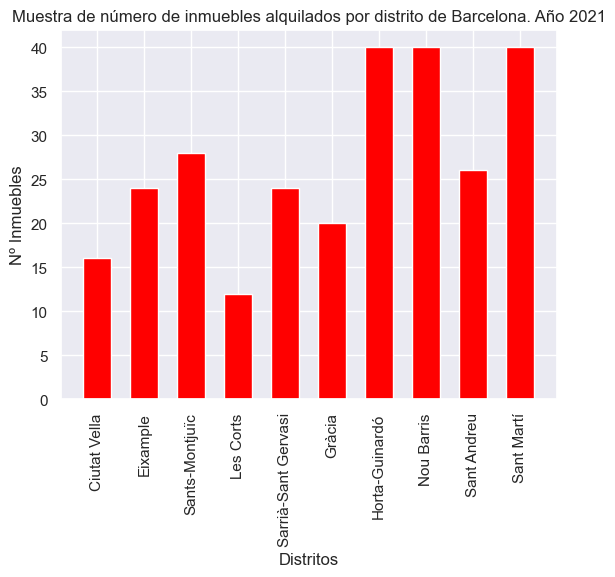

In [60]:
import numpy as np
x= np.array(Preu_Lloguer_Final["Nom_Districte"].unique())
y= np.array(Preu_Lloguer_Final.groupby('Codi_Districte')['Nom_Districte'].count())
plt.xticks(rotation='vertical')
plt.ylabel('Nº Inmuebles')
plt.xlabel('Distritos')
plt.title('Muestra de número de inmuebles alquilados por distrito de Barcelona. Año 2021')
plt.bar(x,y, width=0.6,color = "red")
plt.savefig("NºInmuebles_Alqui_Distrito.jpg", bbox_inches='tight')
plt.show()

- Los barrios con mayor número de inmuebles alquilados en la muestra son: Horta, Nou Barris y Sant Marti con 40 inmuebles. En segundo sitio está Sants con 28 y al final encontramos a Les Corts con 12 inmuebles alquiados en la muestra.

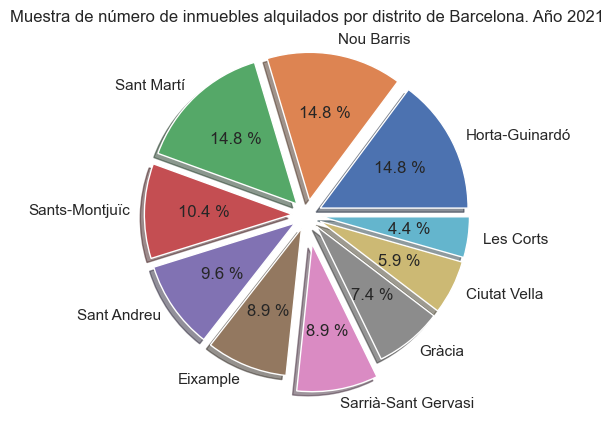

In [61]:
labels = ['Horta-Guinardó','Nou Barris','Sant Martí','Sants-Montjuïc',
          'Sant Andreu','Eixample','Sarrià-Sant Gervasi',
          'Gràcia','Ciutat Vella','Les Corts']
exp = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.1, 0.1, 0.1]
plt.title('Muestra de número de inmuebles alquilados por distrito de Barcelona. Año 2021')
plt.pie(Preu_Lloguer_Final[['Codi_Districte']].value_counts(), labels=labels, explode = exp, autopct="%0.1f %%", shadow=True)
plt.savefig("NºInmuebles_Alqui_Distrito_Pie.jpg", bbox_inches='tight')
plt.show()

- Sant Marti, Nou Barris y Horta-Guinardó tienen, cada uno, el 14.8% del total de inmuebles alquilados de la muestra; es decir concentran el 44.4% del total entre los tres. En cambio, Les corts sólo tiene el 4.4% de los inmuebles alquilados de la muestra. 

### Visualización variable numérica Preu_Mitjà_m2_Mes y visualización de Preu_Mitjà_Lloguer_Mes

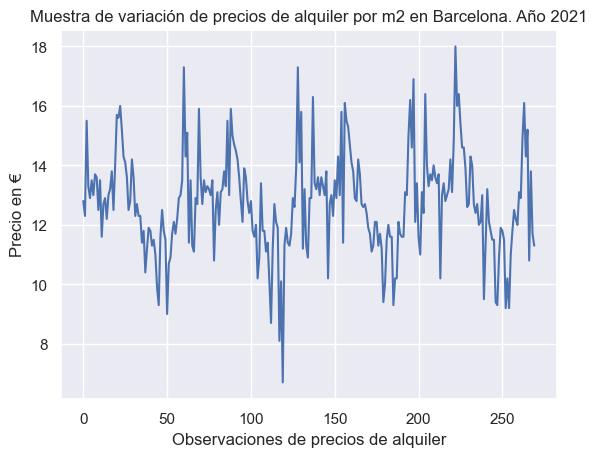

In [62]:
y = np.array(Preu_Lloguer_Final["Preu_Mitjà_m2_Mes"])
plt.ylabel('Precio en €')
plt.xlabel('Observaciones de precios de alquiler')
plt.title('Muestra de variación de precios de alquiler por m2 en Barcelona. Año 2021')
plt.plot(y)
plt.savefig("Variacion_Precios_m2", bbox_inches='tight')
plt.show()

- Los precios de alquiler por metro<sup>2</sup> en Barcelona varían de 6.8€ metro<sup>2</sup> a 18€ metro<sup>2</sup>. La mayoría de los precios oscilan entre 11€ y 14€ metro<sup>2</sup>.

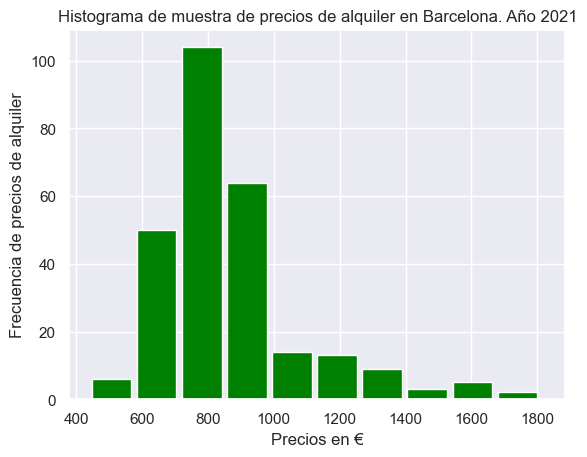

In [63]:
Preu_Lloguer_Final["Preu_Mitjà_Lloguer_Mes"].plot.hist(width=120,color='green')
plt.ylabel('Frecuencia de precios de alquiler')
plt.xlabel('Precios en €')
plt.title('Histograma de muestra de precios de alquiler en Barcelona. Año 2021')
plt.savefig("Histograma_precios_Alquiler", bbox_inches='tight')
plt.show()

- La distribución de los precios de alquiler en Barcelona año 2021 está sesgada a la derecha o es asímetrica positiva. Varían de unos 450€ a 1,800€ y la mayoría se encuentra entre 600€ y 970€ con su máximo alrededor de los 800€. 

### Visualización variable numérica y una categórica: Codi_Districte y Preu_Mitjà_Lloguer_Mes

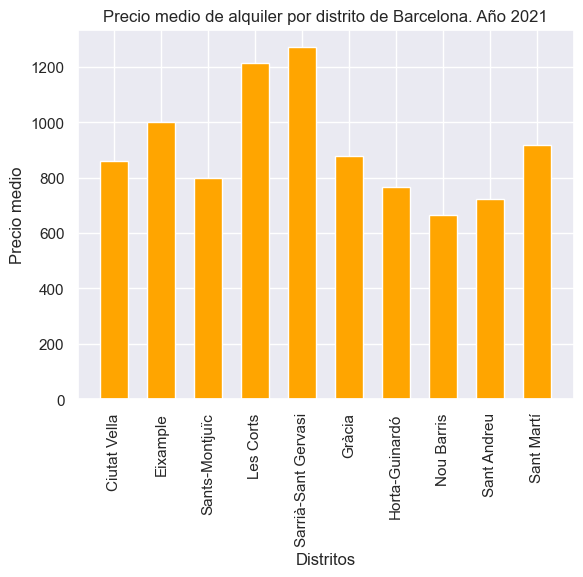

In [64]:
x= np.array(Preu_Lloguer_Final["Nom_Districte"].unique())
y= np.array(round(Preu_Lloguer_Final.groupby('Codi_Districte')
          ['Preu_Mitjà_Lloguer_Mes'].sum()/Preu_Lloguer_Final.groupby('Codi_Districte')['Preu_Mitjà_Lloguer_Mes'].count(),2))
plt.xticks(rotation='vertical')
plt.ylabel('Precio medio')
plt.xlabel('Distritos')
plt.title('Precio medio de alquiler por distrito de Barcelona. Año 2021')
plt.bar(x,y, width=0.6,color = "orange")
plt.savefig("Precio_medio_alquiler_distrito", bbox_inches='tight')
plt.show()

- Los precios medios de alquiler por barrio en Barcelona en el año 2021 superan los 1,000€ al mes en Sarrià-Sant Gervasi, Les Corts y el Eixample, siendo el más alto el precio promedio de Sarrià-Sant Gervasi con 1,271€ al mes. Por la otra banda, Nou Barris con un precio medio de alquiler mensual de 664€ fue el distrito más económico para alquilar una vivienda en el 2021. 

### Visualización de dos variables numéricas: Trimestre y Preu_Mitjà_Lloguer_Mes

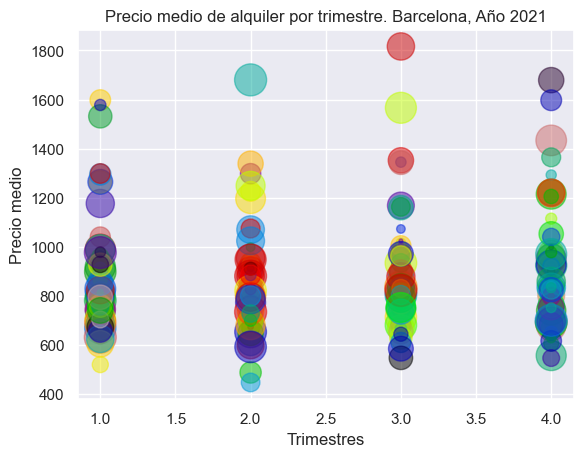

In [65]:
x=np.array(Preu_Lloguer_Final["Trimestre"])
y=np.array(Preu_Lloguer_Final['Preu_Mitjà_Lloguer_Mes'])
colors = np.random.randint(270, size=(270))
sizes = 2*np.random.randint(270, size=(270))
plt.title('Precio medio de alquiler por trimestre. Barcelona, Año 2021')
plt.ylabel('Precio medio')
plt.xlabel('Trimestres')
plt.scatter(x, y, c=colors, s=sizes, alpha=0.5, cmap='nipy_spectral')
plt.savefig("Precio_medio_alquiler_trimestre", bbox_inches='tight')
plt.show()

- Era mi primera gráfica antes de conocer Seaborn. La explicación está en la siguiente gráfica realizada con Seaborn. 

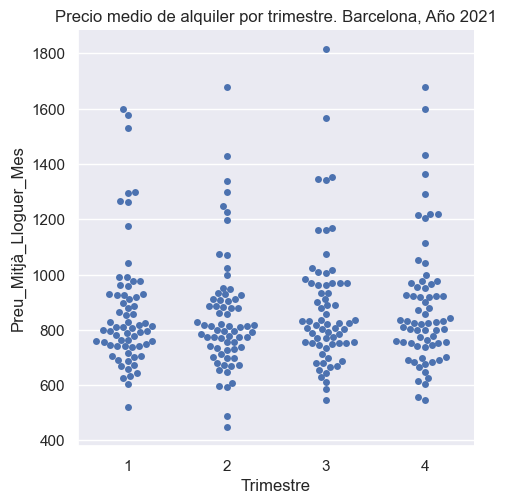

In [66]:
import seaborn as sns
sns.set_theme()
sns.catplot(data=Preu_Lloguer_Final, kind="swarm", x="Trimestre", y='Preu_Mitjà_Lloguer_Mes')
plt.title('Precio medio de alquiler por trimestre. Barcelona, Año 2021')
plt.savefig("Precio_alquiler_trimestre_sns", bbox_inches='tight')
plt.show()

- Los precios de alquiler en Barcelona no varían mucho entre trimestres del año 2021. Se observa una muy ligera subida de precios en el tercer trimestre que probablemente tiene que ver con que son los precios en el verano y los turístas están dispuestos a pagar un mayor alquiler. El precio más alto de todos se observa en el tercer trimestre, es alrededor de 1,800€ al mes. El precio más bajo se observa en el segundo trimestre, unos 450€ mensuales. 

### Visualización de tres variables: Trimestre, Districte y Preu_Mitjà_Lloguer_Mes

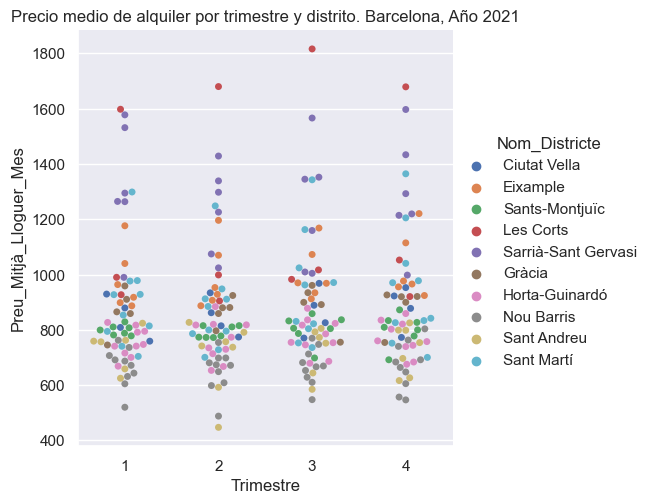

In [67]:
sns.catplot(data=Preu_Lloguer_Final, kind="swarm", x="Trimestre", y='Preu_Mitjà_Lloguer_Mes',hue="Nom_Districte")
plt.title('Precio medio de alquiler por trimestre y distrito. Barcelona, Año 2021')
plt.savefig("Precio_medio_ alquiler_trimDistrito1", bbox_inches='tight')
plt.show()

- Añadiendo los distritos al gráfico anterior como tercera variable, observamos que el precio de alquiler más alto en 2021 en Barcelona es para Sarrià-Sant Gervasi, unos 1,800€ al mes y el más bajo es para Sant Andreu sobre 450€ mes. Se observa también que los precios varían poco entre trimestres con un repunte pequeño en verano. También se puede concluir que la mayoría de precios rondan los 800€ al mes independientemente del trimestre.  

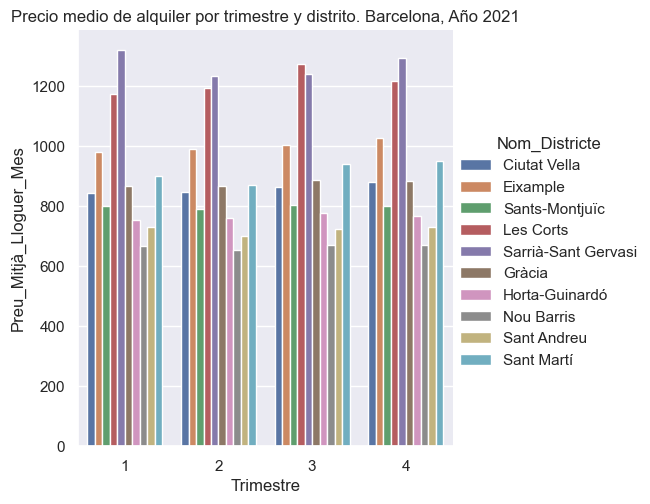

In [68]:
sns.catplot(data=Preu_Lloguer_Final,kind="bar", x="Trimestre", 
            y='Preu_Mitjà_Lloguer_Mes',hue="Nom_Districte",errorbar=('ci', 0))
plt.title('Precio medio de alquiler por trimestre y distrito. Barcelona, Año 2021')
plt.savefig("Precio_medio_ alquiler_trimDistrito2", bbox_inches='tight')
plt.show()

- Al evaluar los precios medios de 2021 de alquiler mensual por trimestre y distrito en Barcelona, los más altos corresponden a Sarrià-Sant Gervasi y Les Corts. El alquiler promedio más alto se pagó el primer trimestre en Sarrià-Sant Gervasi, alrededor de 1,300€. También Nou Barris es el distrito más económico para alquilar vivienda durante todo el año. El precio más bajo de alquiler promedio se pagó en Nou Barris, alrededor de 650€ y fue el segundo trimestre. 
- Si observamos la estabilidad de los precios promedio de alquiler a los largo de los trimestres de 2021, vemos que los distritos con mayores variaciones son justamente los más caros (Sarrià-Sant Gervasi y Les Corts). En el Eixample se observa una muy ligera subida de precios conforme avanzan los trimestres del año y en general el resto de alquileres medios se mantienen en el resto de distritos a lo largo de los cuatro trimestres. 

# Ejercicio 2

- Dentro del código de cada gráfico está el código para exportarlos como JPG. 

# Ejercicio 3

In [69]:
Metros2 = Preu_Lloguer_Final['Preu_Mitjà_Lloguer_Mes']/Preu_Lloguer_Final['Preu_Mitjà_m2_Mes']

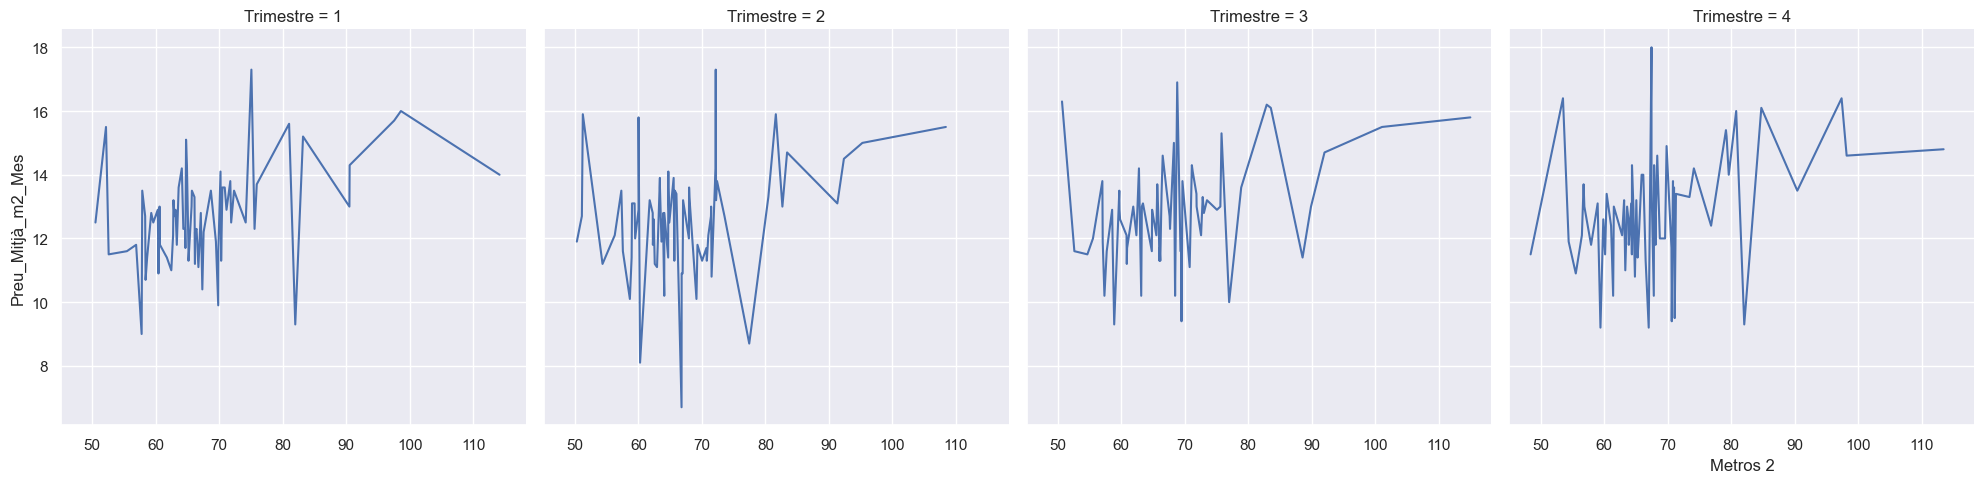

In [70]:
sns.relplot(data=Preu_Lloguer_Final, kind="line",
    x= Metros2, y='Preu_Mitjà_m2_Mes', col="Trimestre")
plt.xlabel('Metros 2')
plt.show()

In [71]:
Metros2.describe()

count    270.000000
mean      68.007086
std       10.711549
min       48.434783
25%       61.802622
50%       65.949680
75%       71.094676
max      114.968354
dtype: float64

- Los precios de alquiler por m<sup>2</sup> y los mts<sup>2</sup> de la muestra, tienen una correlación positiva, cuando sube el alquiler por m<sup>2</sup> sube el m<sup>2</sup>, pasa en todos los trimestres de 2021. Al parecer esta relación es así porque las viviendas son pequeñas, un máximo en la muestra de 115m<sup>2</sup> y una superficie media de 68m<sup>2</sup>. 
- En los mismos gráficos podemos observar que en las viviendas más grandes esta relación positiva comienza a cambiar con caídas de precio por metro<sup>2</sup> para las viviendas más grandes. Si tuviéramos datos de precio de alquiler para viviendas más grandes, probablemente observaríamos que en la medida que la vivienda es más grande su precio por m<sup>2</sup> baja, pero lo dejamos como hipótesis. 